In [2]:
pip install numpy pandas matplotlib tensorflow scikit-learn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [25]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [26]:


# Use only the 'Close' column for prediction
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
training_data_len = int(np.ceil(len(data) * 0.8))
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

# Create the training dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays and reshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the testing dataset
x_test = []
y_test = data[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to numpy arrays and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [27]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
!pip install tensorflow

In [29]:
# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
40/40 [==============================] - 9s 114ms/step - loss: 0.0096 - val_loss: 7.4635e-04
Epoch 2/100
40/40 [==============================] - 2s 57ms/step - loss: 9.9823e-04 - val_loss: 6.1455e-04
Epoch 3/100
40/40 [==============================] - 2s 57ms/step - loss: 9.3967e-04 - val_loss: 5.6006e-04
Epoch 4/100
40/40 [==============================] - 2s 57ms/step - loss: 8.4120e-04 - val_loss: 5.1704e-04
Epoch 5/100
40/40 [==============================] - 2s 55ms/step - loss: 7.7478e-04 - val_loss: 5.1099e-04
Epoch 6/100
40/40 [==============================] - 3s 76ms/step - loss: 7.6988e-04 - val_loss: 5.2631e-04
Epoch 7/100
40/40 [==============================] - 3s 77ms/step - loss: 7.9999e-04 - val_loss: 5.8062e-04
Epoch 8/100
40/40 [==============================] - 2s 56ms/step - loss: 6.9807e-04 - val_loss: 5.4174e-04
Epoch 9/100
40/40 [==============================] - 2s 56ms/step - loss: 6.5057e-04 - val_loss: 4.3418e-04
Epoch 10/100
40/40 [===========

In [30]:
# Ensure X_test is defined and contains the test data
# ... Code to load or create X_test ...

# Predict the stock prices
predicted_stock_price = model.predict(x_test)

# Alternatively, if the user intended to use x_train:
# predicted_stock_price = model.predict(x_train)

# ... Remaining code to inverse transform and visualize results ...

13/13 [==============================] - 1s 17ms/step


In [31]:
train_size = len(x_train)

13/13 [==============================] - 0s 16ms/step


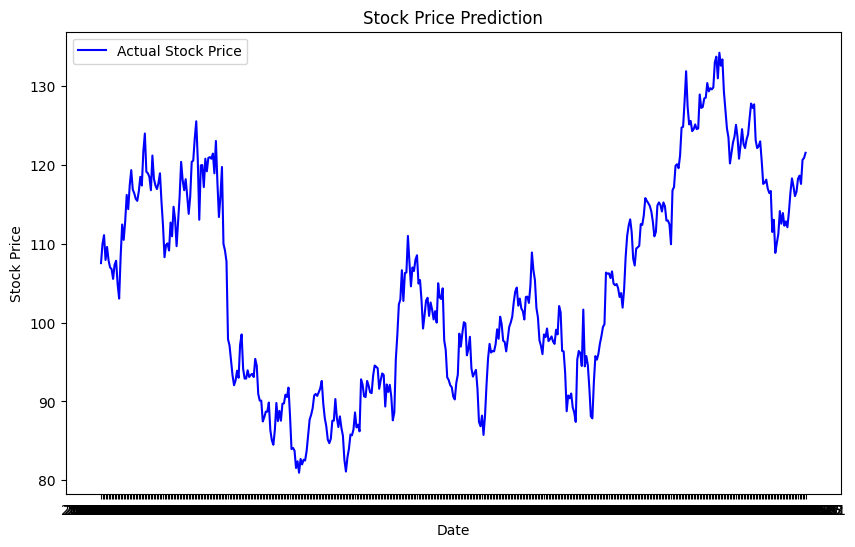

In [34]:
# Predicting the stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][train_size:], scaler.inverse_transform(scaled_data[train_size:]), color='blue', label='Actual Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
